In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
df = pd.read_csv("datasets\Salary_Data.csv")

# for example values you can use either df.head() or df.tail() 
# these are useful later when we test our model

# use any skills learnt in the data analytics course
# in order to modify the data as you need 
# see materials and exercise description in order to see what 
# changes have to be made into the dataset
# often: handle missing data, do the data conversions as needed

In [12]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='YearsExperience', ylabel='Density'>

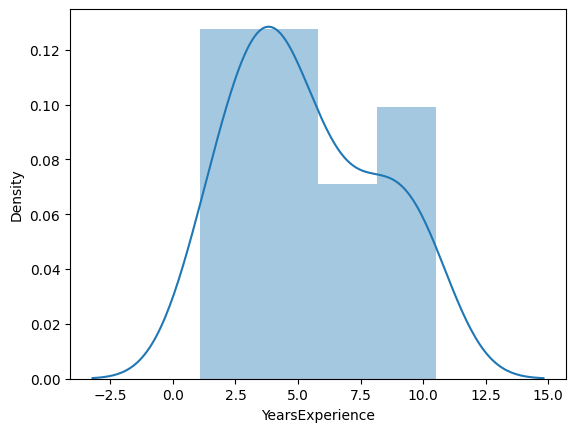

In [15]:
sns.distplot(df['YearsExperience'])

In [17]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [18]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['YearsExperience']]

# have only the target variable here (dependent variable)
y = df['Salary']

In [19]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
intercept = lm.intercept_

# this will be a list of variables (to support multiple linear regression)
# the slopes of the different variables in the linear regression formula
coefs = lm.coef_

# if you want to have a nice table of different variable values:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
YearsExperience,9577.17175


In [22]:
predictions = lm.predict(X_test)

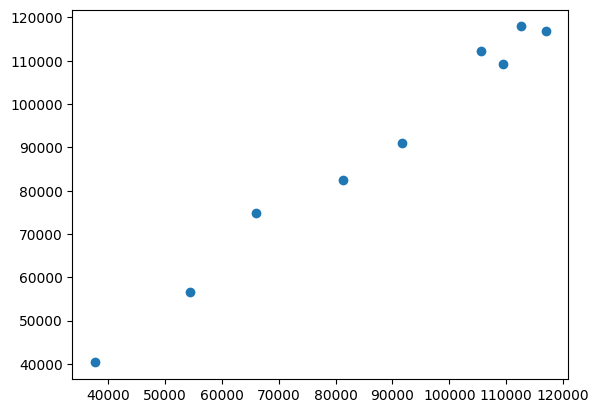

In [23]:
# these values follow a line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
plt.scatter(y_test, predictions)
plt.show()

In [40]:
test_experience = 8

# let's try with some new imaginary data
tester_row = {
    'YearsExperience': test_experience
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [41]:
result = lm.predict(tester_row)[0]

print()
print(f"Predicted salary with {test_experience} years of work experience:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted salary with 8 years of work experience:
102593.19 $
----------------


In [42]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
3038.68 $

MSE
17978409.5 $^2

RMSE:
4240.1 $

R-squared:
0.97
